## Klasifikacija malignog i benignog raka dojke koristeći algoritme strojnog učenja: VIZUALIZACIJA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing as pp

df1 = pd.read_csv('data.csv')

In [2]:
df1.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df1.drop(['Unnamed: 32'], axis=1, inplace=True)

Oblik podataka:

In [4]:
df1.shape

(569, 32)

Početni skup podataka sadrži 569 instance i 32 atributa.

Nazivi stupaca:

In [5]:
df1.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

Trebamo normalizirati nazive (sve spojeno donjim crtama).

In [6]:
df1.rename(columns={'concave points_worst': 'concave_points_worst', 'concave points_mean': 'concave_points_mean', 'concave points_se': 'concave_points_se'}, inplace=True)

#### Pojašnjenja značajki:
  - **diagnosis** - skupina karcinoma - B=benigni, M=maligni
  - **radius** - srednja vrijednost udaljenosti ruba stanice od središta
  - **texture** - stdev sivih vrijednosti
  - **perimeter** - opseg stanice
  - **area** - površina stanice
  - **smoothness** - lokalna varijacija radijusa
  - **compactness** - opseg^2 / površina - 1.0
  - **concavity** - izraženost konkavnih dijelova konture
  - **concave_points** - broj konkavnih dijelova na konturi
  - **symmetry** - simetrija
  - **fractal_dimension** - $aproksimacija\_obale - 1$
  
*Za brojčane vrijednosti postoje atributi _mean_, _se_ i _worst_, koji predstavljaju srednju vrijednost, standardnu pogrešku i srednju najgoru vrijednost.

In [7]:
df1.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### Tipovi podataka

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Tipovi podataka su očekivani.

### Monotonost

In [9]:
df1.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

Atribut _id_ možemo izbaciti (jedinstven za svaku instancu). Ostali atributi imaju puno jedinstvenih vrijednosti, ali to ima smisla jer su to mjerenja (decimalni brojevi).

In [10]:
df1.drop(['id'], axis=1, inplace=True)

### Pretvorba u numeričke vrijednosti

Atributa _diagnosis_ treba je pretvoriti u 0/1

B=0, M=1

In [11]:
le = pp.LabelEncoder()
df1['diagnosis'] = le.fit_transform(df1['diagnosis'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Nedostajući podatci

In [12]:
df1.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Izvrsno, nema nedostajućih vrijednosti

### Outliers

In [13]:
df1.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

Iz sažetka možemo odrediti sumnjive atribute (ako im je max puno veći od trećeg kvartila). Njih ćemo vizualizirati box-plotom.

In [14]:
def remove_outliers(df, col, limit0, limit1):
    df.drop(df[(df['diagnosis'] == 0) & (df[col] > limit0)].index, inplace=True)
    df.drop(df[(df['diagnosis'] == 1) & (df[col] > limit1)].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

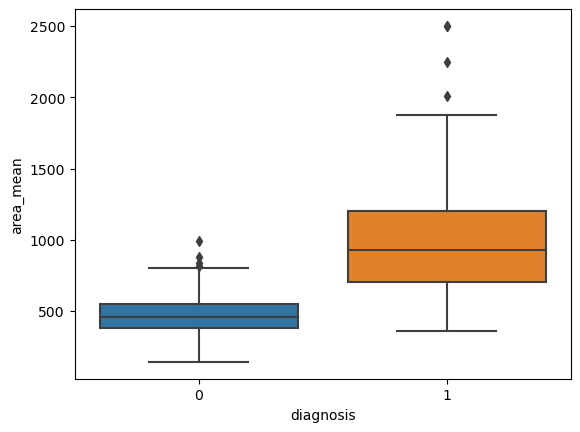

In [15]:
sns.boxplot(x="diagnosis", y='area_mean', data=df1)
plt.show()

In [16]:
remove_outliers(df1, 'area_mean', 900, None)

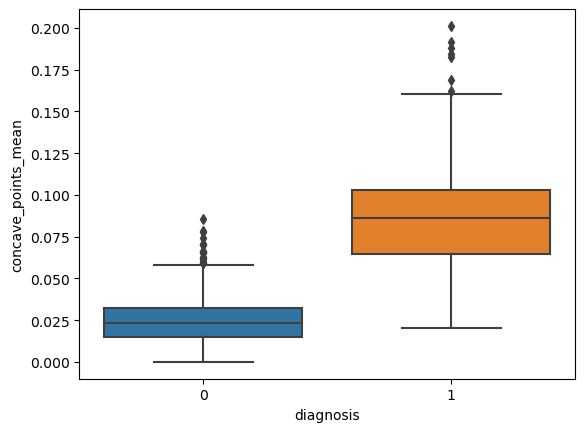

In [17]:
sns.boxplot(x="diagnosis", y='concave_points_mean', data=df1)
plt.show()

In [18]:
remove_outliers(df1, 'concave_points_mean', 0.07, 0.18)

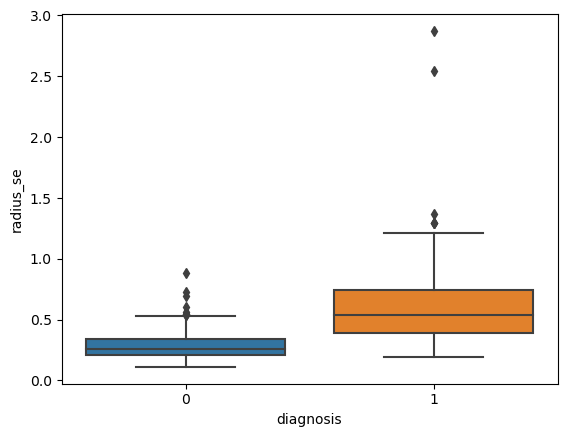

In [19]:
sns.boxplot(x="diagnosis", y='radius_se', data=df1)
plt.show()

In [20]:
remove_outliers(df1, 'radius_se', 0.6, 1.25)

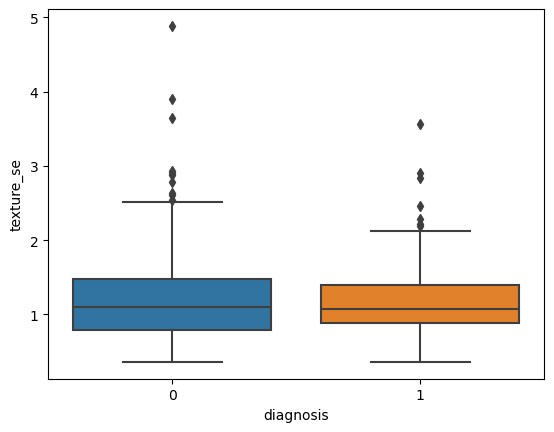

In [21]:
sns.boxplot(x="diagnosis", y='texture_se', data=df1)
plt.show()

In [22]:
remove_outliers(df1, 'texture_se', 2.5, 2.5)

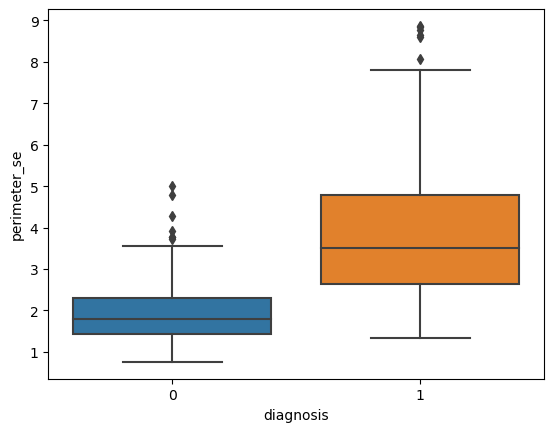

In [23]:
sns.boxplot(x="diagnosis", y='perimeter_se', data=df1)
plt.show()

In [24]:
remove_outliers(df1, 'perimeter_se', 4, 8)

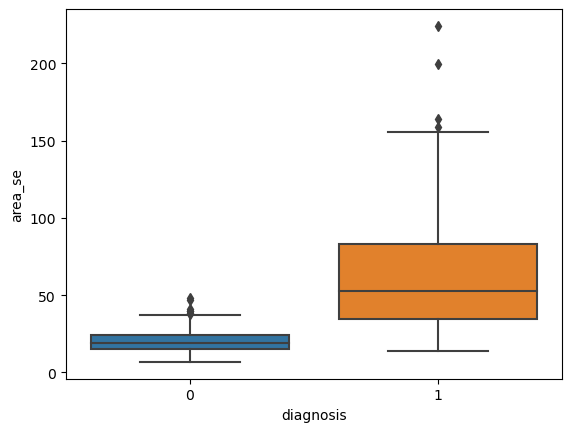

In [25]:
sns.boxplot(x="diagnosis", y='area_se', data=df1)
plt.show()

In [26]:
remove_outliers(df1, 'area_se', 40, 150)

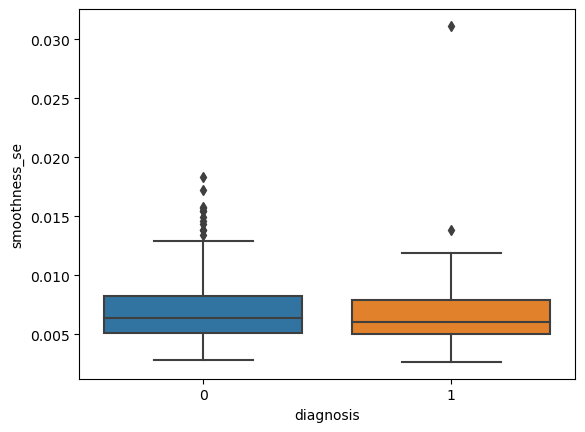

In [27]:
sns.boxplot(x="diagnosis", y='smoothness_se', data=df1)
plt.show()

In [28]:
remove_outliers(df1, 'smoothness_se', 0.013, 0.013)

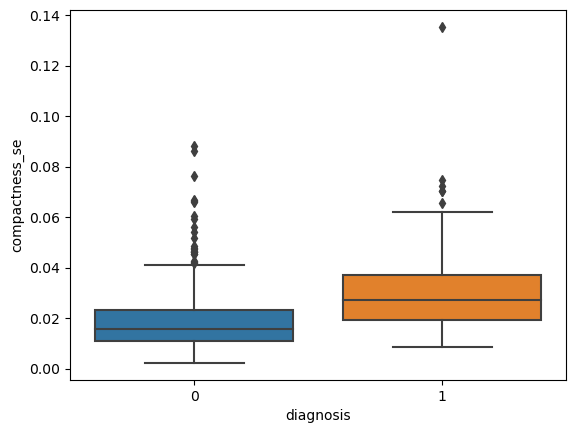

In [29]:
sns.boxplot(x="diagnosis", y='compactness_se', data=df1)
plt.show()

In [30]:
remove_outliers(df1, 'compactness_se', 0.045, 0.07)

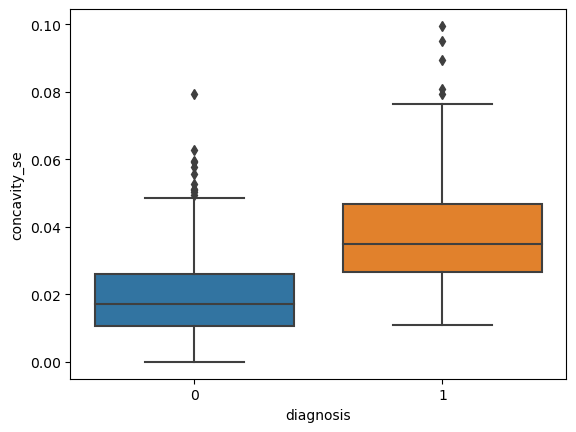

In [31]:
sns.boxplot(x="diagnosis", y='concavity_se', data=df1)
plt.show()

In [32]:
remove_outliers(df1, 'concavity_se', 0.05, 0.08)

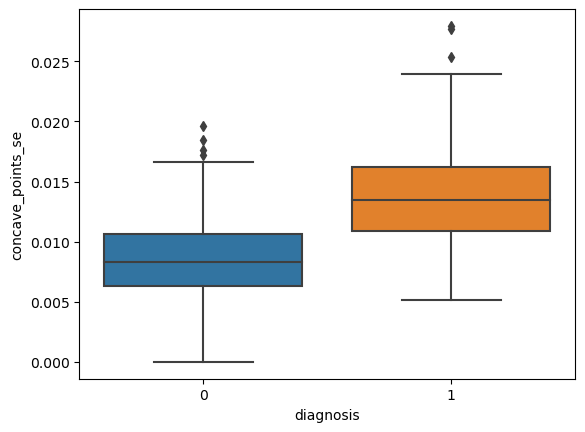

In [33]:
sns.boxplot(x="diagnosis", y='concave_points_se', data=df1)
plt.show()

In [34]:
remove_outliers(df1, 'concave_points_se', 0.017, 0.023)

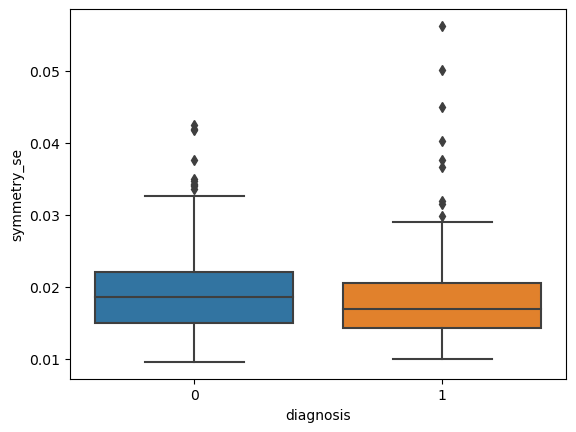

In [35]:
sns.boxplot(x="diagnosis", y='symmetry_se', data=df1)
plt.show()

In [36]:
remove_outliers(df1, 'symmetry_se', 0.032, 0.03)

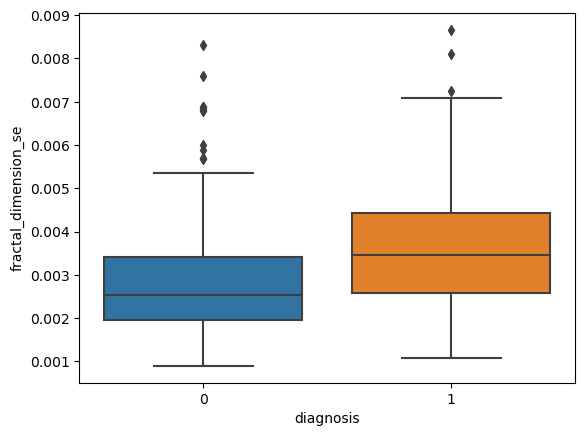

In [37]:
sns.boxplot(x="diagnosis", y='fractal_dimension_se', data=df1)
plt.show()

In [38]:
remove_outliers(df1, 'fractal_dimension_se', 0.0055, 0.0075)

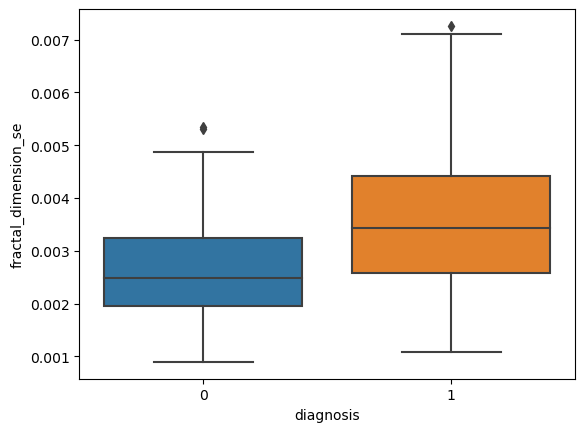

In [39]:
sns.boxplot(x="diagnosis", y='fractal_dimension_se', data=df1)
plt.show()

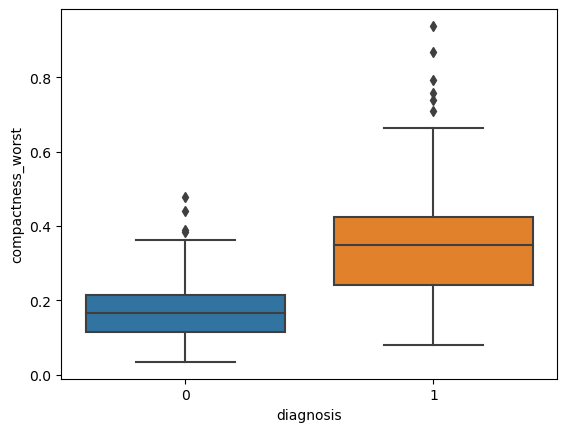

In [40]:
sns.boxplot(x="diagnosis", y='compactness_worst', data=df1)
plt.show()

In [41]:
remove_outliers(df1, 'compactness_worst', 0.37, 0.7)

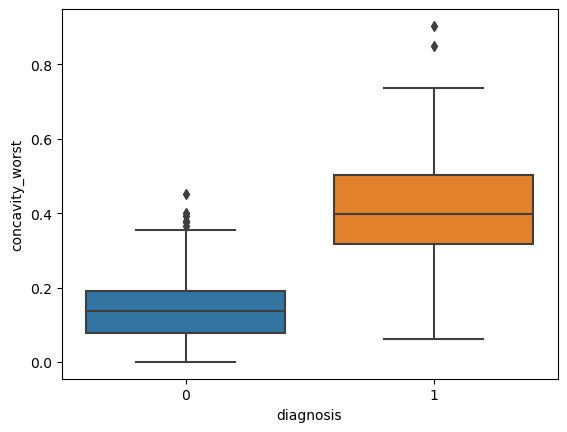

In [42]:
sns.boxplot(x="diagnosis", y='concavity_worst', data=df1)
plt.show()

In [43]:
remove_outliers(df1, 'concavity_worst', 0.37, 0.8)

Preostali broj primjeraka je:

In [44]:
len(df1)

406

Spremimo čisti skup ako ćemo ga koristiti kasnije:

In [45]:
df1.to_csv('data_clean.csv', index=False)

## Vizualizacija

In [46]:
df1.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  406.000000   406.000000    406.000000      406.000000   406.000000   
mean     0.379310    14.161113     19.103498       91.780148   648.685714   
std      0.485814     3.052963      4.263150       20.885617   292.382458   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    12.052500     16.090000       77.235000   445.475000   
50%      0.000000    13.495000     18.635000       87.320000   561.700000   
75%      1.000000    15.780000     21.555000      103.700000   782.200000   
max      1.000000    24.630000     39.280000      165.500000  1841.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       406.000000        406.000000      406.000000           406.000000   
mean          0.094599          0.092455        0.072923             0.044152   
std           0.012764          0.040678        0.061665             0.033399   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.085110          0.060820        0.026392             0.019030   
50%           0.094320          0.083465        0.048420             0.031210   
75%           0.103075          0.115350        0.111125             0.065702   
max           0.139800          0.214600        0.281000             0.156200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     406.000000  ...    406.000000     406.000000       406.000000   
mean        0.176651  ...     16.322350      25.733990       106.891010   
std         0.022298  ...      4.241205       6.098907        29.013346   
min         0.121500  ...      7.930000      12.020000        50.410000   
25%         0.160325  ...     13.305000      21.122500        85.560000   
50%         0.176100  ...     15.110000      25.465000        98.875000   
75%         0.190775  ...     18.937500      29.885000       125.675000   
max         0.256900  ...     29.920000      49.540000       205.700000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   406.000000        406.000000         406.000000       406.000000   
mean    871.320443          0.131777           0.229594         0.240711   
std     476.217366          0.021622           0.124987         0.167675   
min     185.200000          0.081250           0.034320         0.000000   
25%     544.525000          0.116600           0.143400         0.109350   
50%     705.800000          0.130750           0.198950         0.196950   
75%    1093.250000          0.144600           0.296325         0.350000   
max    2642.000000          0.222600           0.664300         0.735600   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            406.000000      406.000000               406.000000  
mean               0.109678        0.288152                 0.080805  
std                0.059583        0.051732                 0.014145  
min                0.000000        0.178300                 0.055210  
25%                0.064047        0.251900                 0.070613  
50%                0.095700        0.280950                 0.078095  
75%                0.155275        0.315450                 0.087618  
max                0.270100        0.555800                 0.140500  

[8 rows x 31 columns]

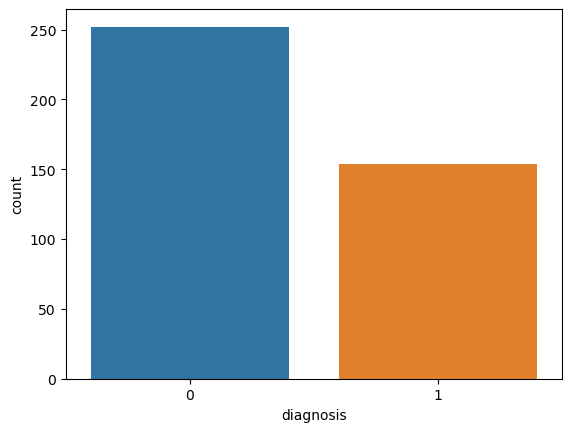

In [47]:
sns.countplot(df1, x='diagnosis')
plt.show()

Skup podataka je nebalansiran (više benignih tumora)!

### Korelacija

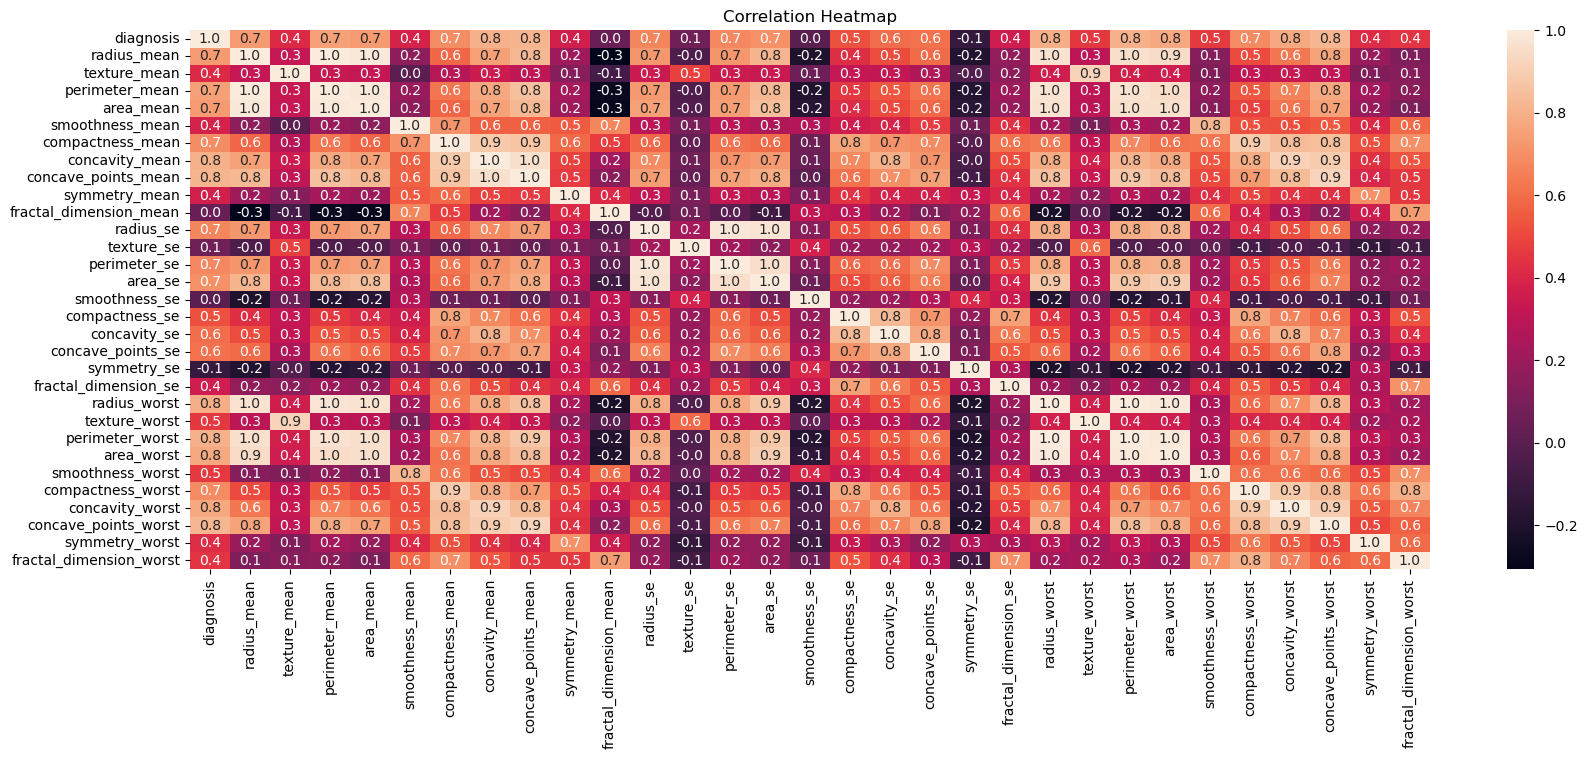

In [48]:
heatmap = sns.heatmap(df1.corr(), xticklabels=True, yticklabels=True, annot=True, fmt='.1f')
heatmap.set_title('Correlation Heatmap')
heatmap.figure.set_size_inches(20, 7)


Vidimo visoku korelaciju dijagnoze i radijusa, opsega, površine, kompaktnosti, konkavnosti i konkavnih točaka.

Postoji potpuna korelacija (1.0) između radijusa, opsega i površine u sve tri skupine atributa.

Slično se događa i kod kompaktnosti, konkavnosti i konkavnih točaka (iako nije uvijek 1.0).

Za sve atribute je vrlo visoka korelacija među grupama _mean_ i _worst_, među grupama _mean_ i _se_ (osim texture, smoothness i symmetry) i među grupama _se_ i _worst_ (uz iste iznimke).

**Zaključujemo da bi se za analize moglo izbaciti neke od koreliranih atributa, a da se ne bi izgubio značajan dio informacije.**

### Distribucije atributa
Analizirat ćemo samo mean atribute (zbog koreliranosti s ostalima).

C:\Users\Neven\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


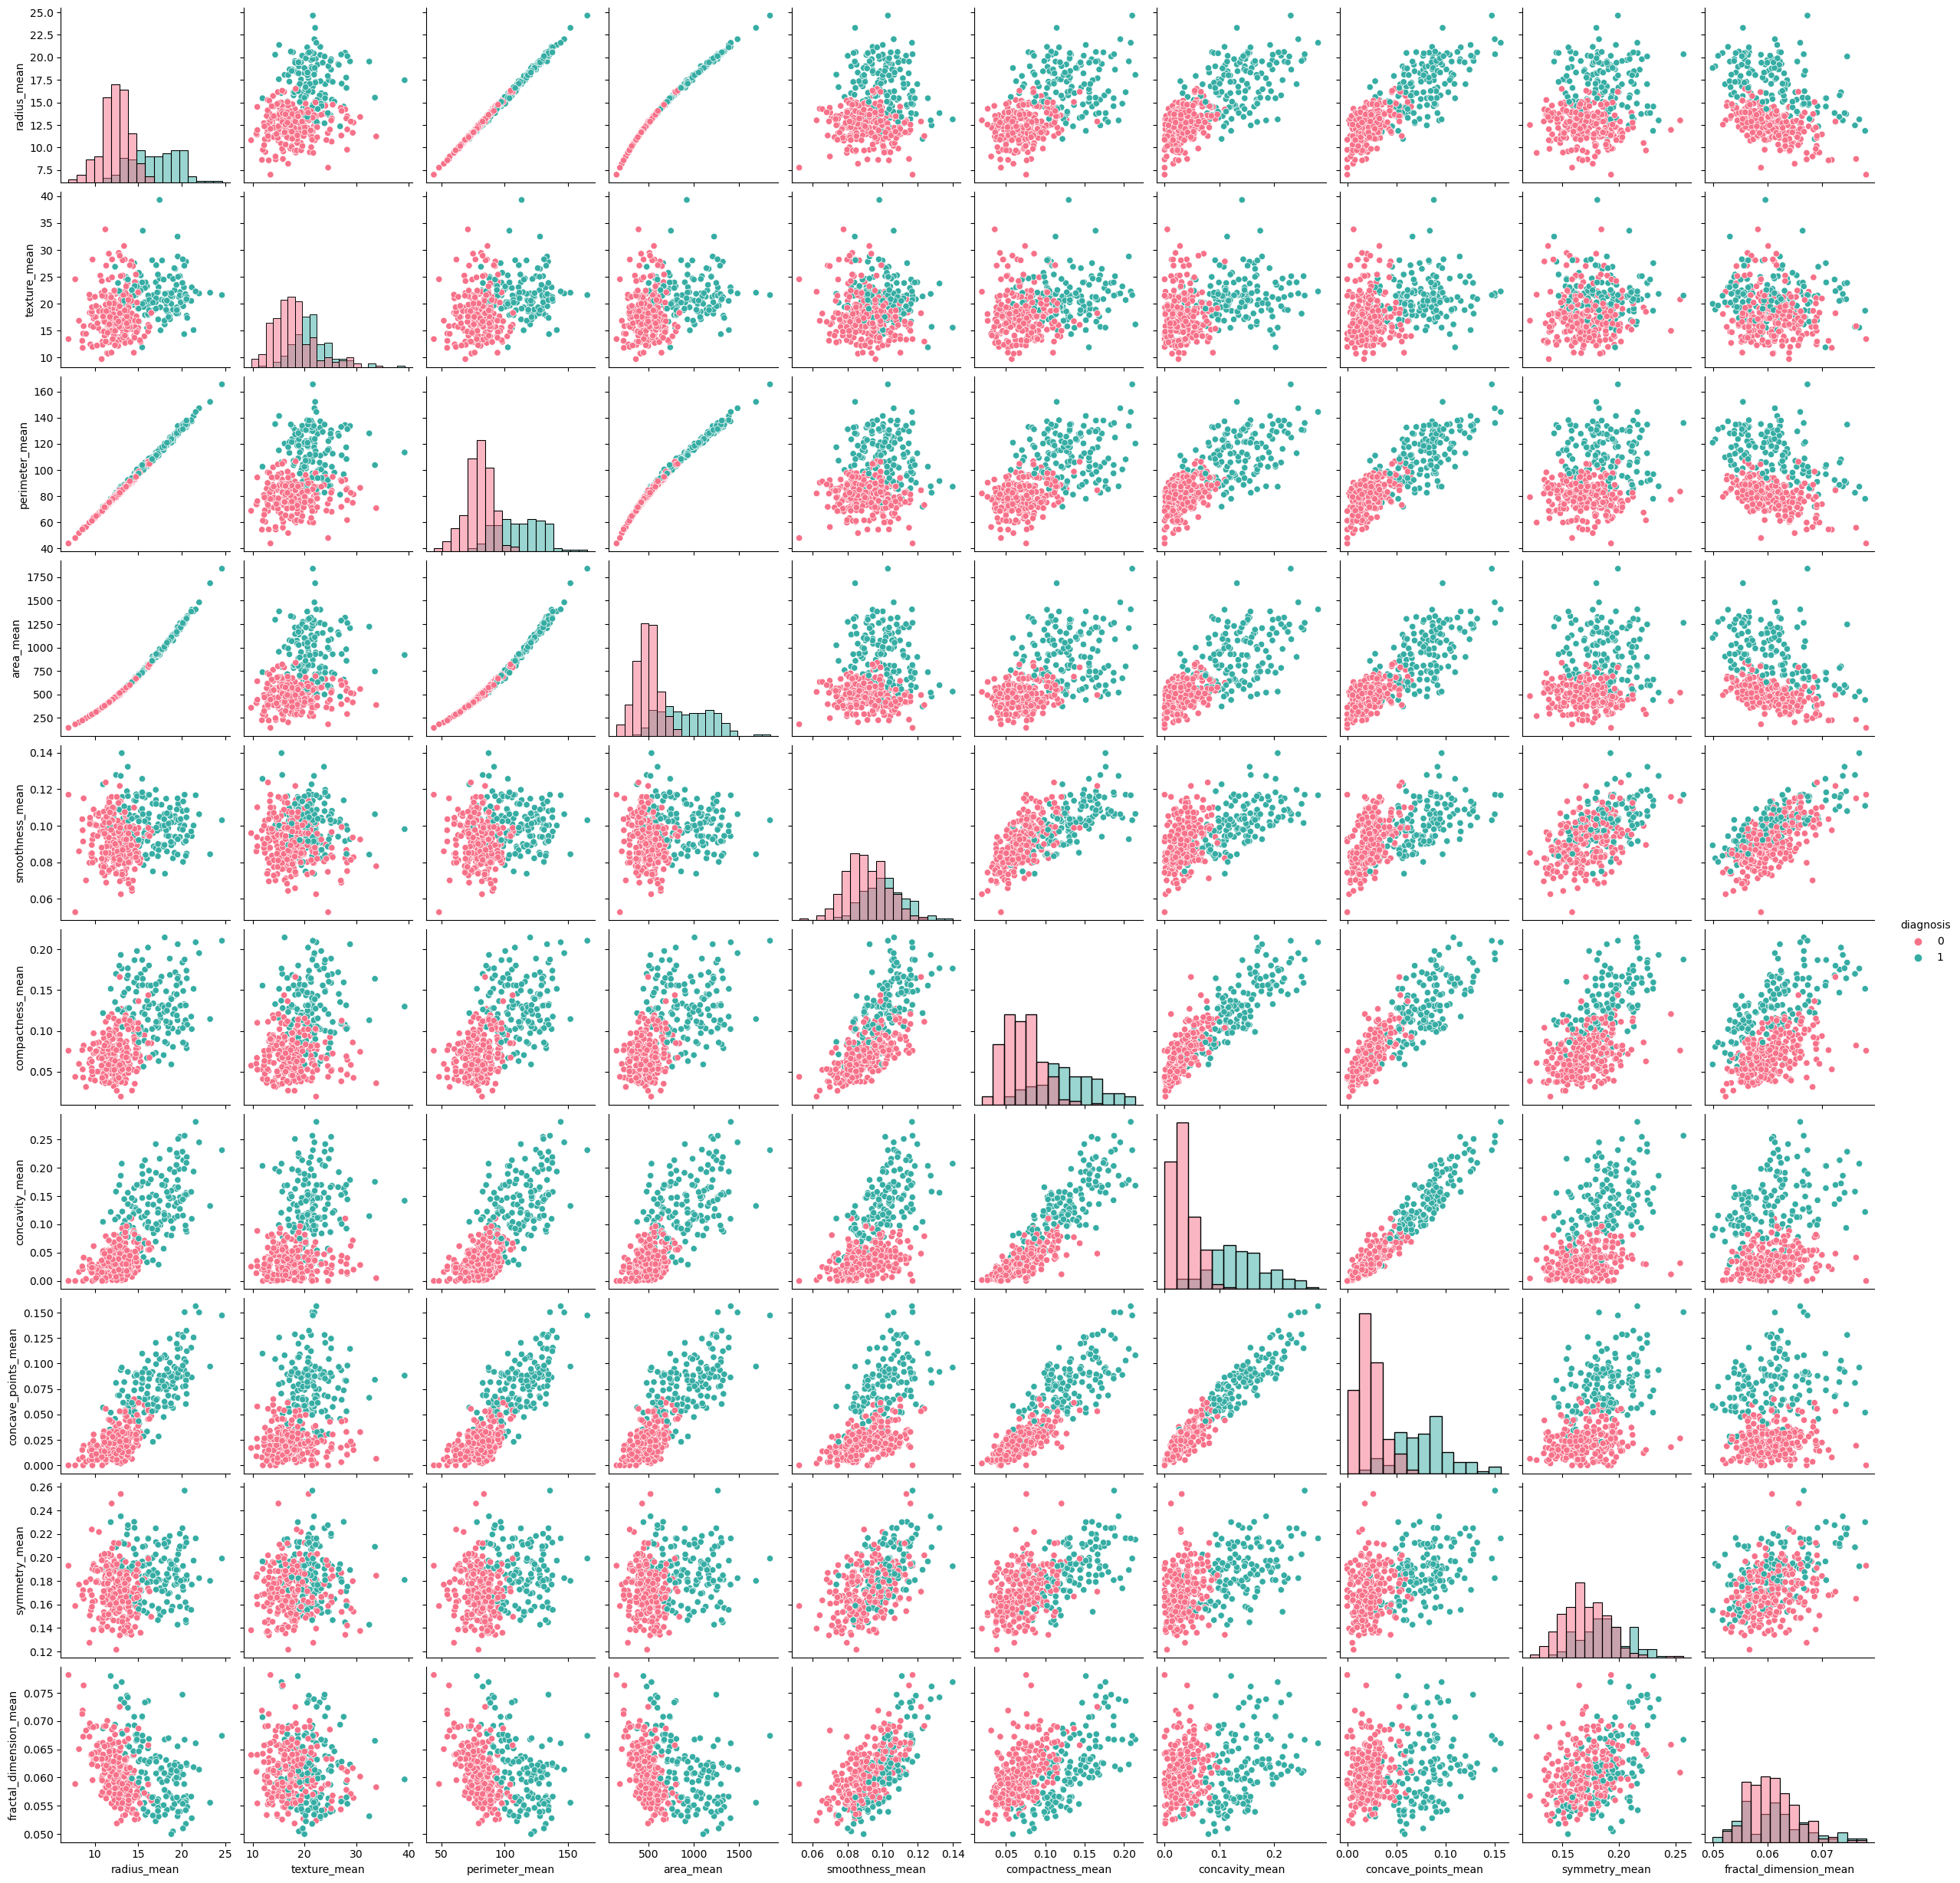

In [49]:
sns.pairplot(df1.filter(regex=".*mean|diagnosis", axis=1), hue='diagnosis', diag_kind='hist', palette='husl')

Iz distribucija vidimo da su jako lijepo korelirani atributi koje smo prepoznali i na heatmapi (radijus, opseg i površina, a osim njih i kompaktnost, konkavnost i konkavne točke).

Kod većine parova atributa su primjerci iz dviju ciljnih klasa jasno odvojeni.

Uglavnom primjećujemo više-manje normalne razdiobe atributa (na dijagonali) ako gledamo pojedine klase.

Ako atributi nemaju puno preklapanja u distribucijama, oni bi mogli biti predviditelji ciljne klase i bez da ih gledamo u paru s nekom drugom varijablom. To su npr. area_mean, concavity_mean i concave_points_mean.
